# Problem 0 - Jhanvi

As we have covered in class, we are training a logistic regression model to predict if
someone will click on an advertisement. Consider the logistic regression model with 3 features and
weights w = [1, −30, 3]. For the dataset with features x1=[20,0,0], y1=1 and x2=[23,1,1], y2=0,
•Compute the probabilities that the logistic regression assigns to these two customers clicking
on the advertisement (i.e. y=1)
•Compute the cross entropy loss of this logistic regression.
•Design a decision stump (a decision tree of depth 1) that splits on the first feature. What is
the Gini impurity of the root? What is the Gini impurity after the best split that you find?

# Problem 1: Logistic Regression and CIFAR-10. - Jhanvi
In this problem you will explore the dataset
CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You
will also explore visualizing the solution.

(Optional) You can read about the CIFAR-10 and CIFAR-100 datasets here: https://www.
cs.toronto.edu/~kriz/cifar.html.
•(Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10
provided by them. Read here for a description: https://www.openml.org/d/40926.
•Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small
data set.
•Figure out how to display some of the images in this data set, and display a couple. While
not high resolution, these should be recognizable if you are doing it correctly.
•There are 20,000 data points. Do a train-test split on 3/4 - 1/4.
•You will run multi-class logistic regression on these using the cross entropy loss. You have to
specify this specifically (multi class=’multinomial’). Use cross validation to see how good
your accuracy can be. In this case, cross validate to find as good regularization coefficients
as you can, for ℓ1 and ℓ2 regularization (called penalties), which are naturally supported in
sklearn.linear model.LogisticRegression. I recommend you use the solver saga.
•Report your training and test loss from above,
•How sparse can you make your solutions without deteriorating your testing error too much?
Here, we ask for a sparse solution that has test accuracy that is close to the best solution you
found.

# Problem 2: Multi-class Logistic Regression – Visualizing the Solution.  - Josh
You will repeat
the previous problem but for the MNIST dataset which you will find here: https://www.openml.
org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image
recognition problems in computer vision. We will see here how well logistic regression does, as you
did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and
that in connection to this, sparsity can be useful.
•Use the fetch openml command from sklearn.datasets to import the MNIST data set,
•Choose a reasonable train-test split, and again run multi-class logistic regression on these
using the cross entropy loss, as you did above. Try to optimize the hyperparameters.
•Report your training and test loss from above,
•Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as
good accuracy.
•Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimen-
sion as the data. Therefore we can pretend that the coefficients of the solution are an image
of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to
the 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look
like the digits they are classifying.

# Problem 3: Revisiting Logistic Regression and MNIST. - Josh
Here we throw the kitchen sink of classical ML (i.e. pre-deep learning) on MNIST.
•Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
Validation to find the best settings. How well can you do? You should use the accuracy
metric to compare to logistic regression. What are the hyperparameters of your best model?
•Use Gradient Boosting to do the same. Try your best to tune your hyper parameters. What
are the hyperparameters of your best model?

# Problem 4: Revisiting Logistic Regression and CIFAR-10. - Jackson
As before, we’ll throw the kitchen sink of classical ML (i.e. pre-deep learning) on CIFAR-10.  
Keep in mind that CIFAR-10 is a few times larger.
* What is the best accuracy you can get on the test data, by tuning Random Forests? 
    * What are the hyperparameters of your best model?
* What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? 
    * What are the hyperparameters of your best model?

In [1]:
#Imports 

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import sklearn.ensemble
import pandas as pd
import numpy as np
import torch



c:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [148]:
#Feature Functions
"""
display_image_grid(...)

SUMMARY
-------
    Given a dataset, either mnist or cifar, show a grid of randomly selected images and their labels

PARAMETERS
----------
    dataset: dict
        dictionary of data information
        REQUIRED KEYS:
            - data := pd.Dataframe containing pixel information in either rgb or grayscale
            - target := true classification
        OPTIONAL KEYS:
            - categories := dictionary mapping from classification target to human text

    grid_width: int
        Number of columns in the grid

    grid_height: int
        Number of rows in the grid

    img_width: int
        width of the image in pixels

    img_height: int
        Height of the image in pixels, likely the same as img_width

    figsize: float
        Size of each image in the grid

    _format: {'RGB', 'grayscale'}
        The format of the images
RETURNS
-------
    None

OUTPUTS
-------
    A 'grid_width' by 'grid_height' grid of images from 'dataset'

"""
def display_image_grid(dataset, 
                        grid_width  = 5,
                        grid_height = 5, 
                        img_width   = 32,
                        img_height  = 32,
                        figsize = 2.0,
                        _format = 'RGB'):
    fig, ax = plt.subplots(grid_height, grid_width, figsize=(figsize*grid_width, figsize*grid_height), facecolor='gray')

    for m in range(grid_height):
        for n in range(grid_width):
            i = np.random.choice(len(dataset['data']))
            ax[m][n].set_axis_off()
            
            if type(dataset['categories']) == dict:
                ax[m][n].set_title('%s: %s'%(i,dataset['categories'][dataset['target'].iloc[i]]))
            else:
                ax[m][n].set_title('%s: %s'%(i, dataset['target'].iloc[i]))

            im = np.array(dataset['data'].iloc[i]).astype('uint8')
            if _format == 'RGB':
                im = im.reshape((img_width, img_height, 3), order='F')
                im = np.swapaxes(im, 0, 1)
                ax[m][n].imshow(im)

            elif _format == 'grayscale':
                im = im.reshape((img_width, img_height), order='F')
                im = np.swapaxes(im, 0, 1)
                ax[m][n].imshow(im, cmap='gray')
            else:
                raise Exception('_format MUST be either RGB or grayscale')


In [4]:
mnist = fetch_openml('mnist_784')
cifar = fetch_openml('cifar_10')
cifar['categories'] = {
    '0' : 'airplane',
    '1' : 'automobile',
    '2' : 'bird',
    '3' : 'cat',
    '4' : 'deer',
    '5' : 'dog',
    '6' : 'frog',
    '7' : 'horse',
    '8' : 'ship',
    '9' : 'truck',
}

In [152]:
#Split the data into train and test, making sure to have the same random state for both (otherwise would have to join, perform the split, then unjoin the target / use the frame then unjoin the target)
cifar_X_train, cifar_X_test = train_test_split(cifar['data'], test_size=0.25, random_state=0) 
cifar_y_train, cifar_y_test = train_test_split(cifar['target'], test_size=0.25, random_state=0)

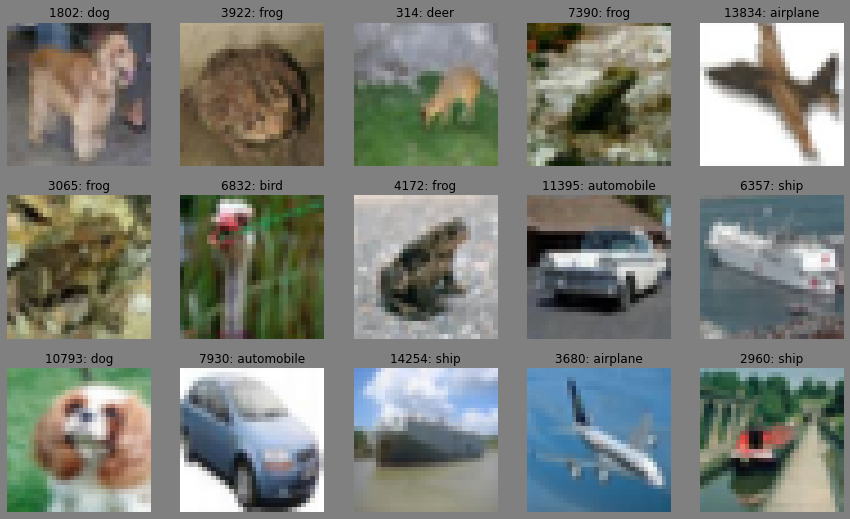

In [184]:
#Visualization of some of the data in the train set
train = {
    'data': cifar_X_train,
    'target': cifar_y_train,
    'categories': cifar['categories']
}

display_image_grid(train, grid_width = 5, grid_height = 3, figsize=3)

In [174]:
from sklearn.model_selection import GridSearchCV

#WARNING - Since I tested some pretty in depth random forests, this takes a LONG TIME to run (8+hrs). 
n_estimators = [2, 4, 8, 16, 32, 64]   #Shorten to only 2, 4, and 8 to reduce runtime
max_depth = [None, 2, 4, 6, 8, 12]
max_features = [None, 'sqrt']           #Set max features to be constant to reduce runtime

params = {'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features}

rfc = sklearn.ensemble.RandomForestClassifier()
rfc = GridSearchCV(rfc, params, verbose=2)
search_results = rfc.fit(cifar_X_train, cifar_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.9s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.8s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.8s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.8s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.8s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=4; total time=   1.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=4; total time=   1.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=4; total time=   1.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=4; total time=   1.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=4; total time=   1.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=8; total time=   1.5s
[CV] END .....max_depth=2, max_features=sqrt, n_e

In [183]:
# Best results from grid search, not a great way to look at the data
print('Training Accuracy:\t%s\nTesting Accuracy:\t%s'%(search_results.best_estimator_.score(cifar_X_train, cifar_y_train), search_results.best_estimator_.score(cifar_X_test, cifar_y_test)))
print('Params: %s' %(search_results.best_params_))

Training Accuracy:	0.7415555555555555
Testing Accuracy:	0.3672
Params: {'max_depth': 12, 'max_features': None, 'n_estimators': 8}


In [185]:
#Now we move on to other network architectures

#Gradient boosting
gbc = sklearn.ensemble.GradientBoostingClassifier()
gbc.fit(cifar_X_train, cifar_y_train)
print('Test Accuracy for Gradient Boost Classifier %s'%(gbc.score(cifar_X_test, cifar_y_test))) #0.465733



GradientBoostingClassifier()

In [ ]:
#Neural Network - Keras

# Problem 5: Getting Started with Pytorch. - Jackson
 * Install Pytorch.
 * Work through this tutorial to familiarize yourself with Pytorch basics: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
 * Work through this tutorial on MNIST starting from a Pytorch logistic regression and building to a CNN using torch.nn. Use a GPU (e.g. on Colab, through Google Cloud credits, Pa-perspace, or any other way). https://pytorch.org/tutorials/beginner/nn_tutorial.html
 * Design the best CNN you can to get the best accuracy on MNIST.

# Problem 6: CNNs for CIFAR-10. - Jackson
* Build a CNN and optimize the accuracy for CIFAR-10. 
    * Try different number of layers and different architectures (depth and convolutional filter hyperparameters).
* Is momentum and learning rate having a significant effect? 
    * Track the train and test loss across training epochs and plot them for different learning rates and momentum values.
* Is the depth of the CNN having a significant effect on performance? 
    * Describe the hyperparameters of the best model you could train.